In [1]:
import pandas as pd

# 데이터 준비
bc_df = pd.read_csv('breast_cancer.csv', index_col=0)
bc_df.head(), bc_df.shape

(   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [2]:
X = bc_df.iloc[:, :-1]
y = bc_df.iloc[:, -1]

In [3]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# PCA 객체 생성 (2개의 주성분으로 축소)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'스케일링 전 : {X_scaled.shape}')
print(f'스케일링 후 : {X_pca.shape}')

스케일링 전 : (569, 30)
스케일링 후 : (569, 2)


In [5]:
# PCA 결과 출력
print("주성분의 분산 설명 비율:", pca.explained_variance_ratio_)

주성분의 분산 설명 비율: [0.44272026 0.18971182]


In [6]:
# 주성분이 원래 차원과 얼마나 관련이 있는지 확인 (loading matrix)
loading_matrix = pd.DataFrame(pca.components_.T,
                              columns=['제1 주성분', '제2 주성분'],
                              index=X.columns)
loading_matrix.head(), loading_matrix.shape

(                   제1 주성분    제2 주성분
 mean radius      0.218902 -0.233857
 mean texture     0.103725 -0.059706
 mean perimeter   0.227537 -0.215181
 mean area        0.220995 -0.231077
 mean smoothness  0.142590  0.186113,
 (30, 2))

In [7]:
pca_df = pd.DataFrame(X_pca, columns = ['제1 주성분', '제2 주성분'])
pca_df = pd.concat([pca_df, y], axis=1)
pca_df.head()

,제1 주성분,제2 주성분,target
0,9.192837,1.948583,malignant
1,2.387802,-3.768172,malignant
2,5.733896,-1.075174,malignant
3,7.122953,10.275589,malignant
4,3.935302,-1.948072,malignant


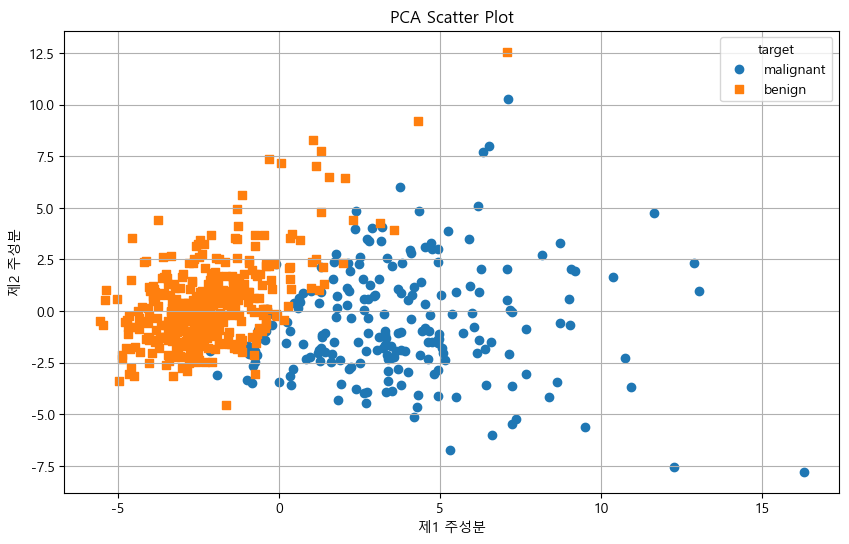

In [8]:
import matplotlib.pyplot as plt

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False


# 색상 설정
colors = plt.colormaps['tab10']

plt.figure(figsize=(10, 6))

# 각 타겟에 대해 스캐터 플롯 생성
targets = pca_df['target'].unique()
for idx, target in enumerate(targets):
    subset = pca_df[pca_df['target'] == target]
    plt.scatter(subset['제1 주성분'], subset['제2 주성분'], 
                label=target, color=colors(idx), marker='o' if idx % 2 == 0 else 's')

plt.title('PCA Scatter Plot')
plt.xlabel('제1 주성분')
plt.ylabel('제2 주성분')
plt.legend(title='target')
plt.grid()
plt.show()
